# Portas Quânticas

Este arquivo usa o framework de programação quântica Qiskit para mostrar as principais portas quânticas e suas contrapartes clássicas. O objetivo é fornecer uma compreensão visual dos efeitos dessas portas em um qubit. 

Antes de tudo, importamos as dependências:

In [1]:
import numpy as np
from qiskit import QuantumCircuit, BasicAer, transpile # Todas as operações quâticas/ Simulador/ Compilador
from qiskit.visualization import plot_histogram, plot_state_qsphere, plot_bloch_multivector # Cria histogramas/ Visalização do estado

## Hadamard

**A porta de Hadamard coloca um qubit em estado de superposição.**

Agora, para efeito didático, na primeira porta teremos todo o passo a passo, mas nas portas seguintes seremos um pouco mais rápidos. Criamos um circuito para cada porta - para que possamos ver seu efeito isoladamente - e adicionamos as portas que queremos:

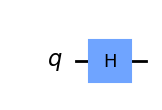

In [2]:
hadamard = QuantumCircuit(1)
hadamard.h(0) # A porta de Hadamard só é aplicada em um qubit por vez
hadamard.draw("mpl")

Para visualizar um estado, é necessário um simulador, utilizaremos o Aer. No entanto, é importante destacar que isso custa um pouco mais de processamento, então, quando desejar fazer isso, cuide para visualizar os estados somente de circuitos pequenos. Criaremos uma função somente para reaproveitar o código nas próximas vezes, mas não se preocupe, tudo será explicado:

In [3]:
def qsphere(circuito):
    # Usamos o get_backend para escolher o dispositivo, ou hardware, que usaremos para simular.
    backend = BasicAer.get_backend('statevector_simulator') 
    
    # Compilamos o código
    cod_compilado = transpile(circuito, backend)
    
    # Executamos o código compilado
    execucao = backend.run(cod_compilado)
    
    # Guardamos o objeto do resultado em uma variável para facilitar a escrita
    resultado = execucao.result()
    
    # Usamos o circuito criado como argumento para get_statevector() para visualizar o estado desse circuito
    estado  = resultado.get_statevector(circuito)
    
    # Plotamos, enfim, a qsphere
    return plot_state_qsphere(circuito)

Existem outras maneiras de representar e visualizar o estado de um qubit ou sistema de qubits. Entretanto, utilizaremos a Qsphere.

A `Qsphere` é uma forma de visualização única do Qiskit de um estado quântico. A amplitude e fase do vetor de estado são traçados em uma esfera. A amplitude é a espessura e intensidade da cor da seta e a fase é a cor.

In [4]:
# O estado do circuito com a porta de hadamard unicamente
qsphere(hadamard)

## Porta NOT ou X

**A Porta X faz um bit-flip no estado do Qubit, ou seja, transforma $\left|0\right>$ para $\left|1\right>$ e visse-versa.**

Por padrão, quando criamos um circuito no Qiskit, os qubits já vêm no estado $\left|0\right>$, por isso, quando aplicarmos a Porta X, seu estado mudará para $\left|1\right>$.

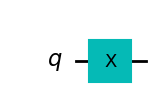

In [5]:
portaX = QuantumCircuit(1)
portaX.x(0) # A porta X também só recebe como argumento o único qubit em que ela estará
portaX.draw("mpl")

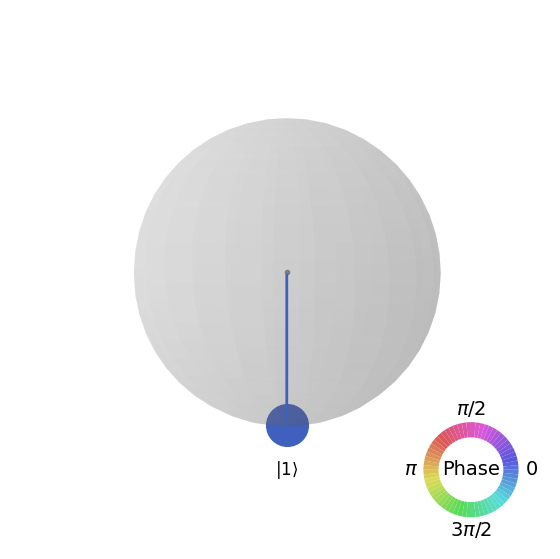

In [6]:
qsphere(portaX)

## Porta Y

**A Porta Y rotaciona 90° em torno do eixo Y no espaço de Bloch.**

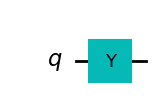

In [7]:
portaY = QuantumCircuit(1)
portaY.y(0)
portaY.draw("mpl")

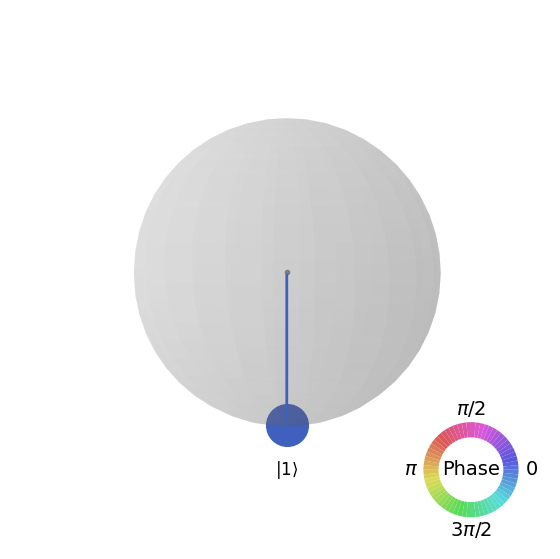

In [8]:
qsphere(portaY)

Note que nada parece diferir da Porta X, uma vez que, nesse exemplo, o estado simplesmente foi para $\left|1\right>$. Mas é preciso entender, de forma geral, que a porta Y pode ser usada para colocar um qubit em um estado desejado, a partir de outro estado conhecido, simplesmente ajustando a fase desse estado. Em alguns casos, a porta Y é utilizada como uma forma de correção de erros, permitindo ajustar a fase de um qubit para corrigir erros na computação quântica.

## Porta Z

**A porta Z rotaciona em $\pi$ no eixo Z se, somente se, o estado anterior for $\left|1\right>$. Caso o estado anterior à porta for $\left|0\right>$, nada acontece.**

In [9]:
portaZ = QuantumCircuit(1)
portaZ.z(0)
portaZ.draw("mpl")

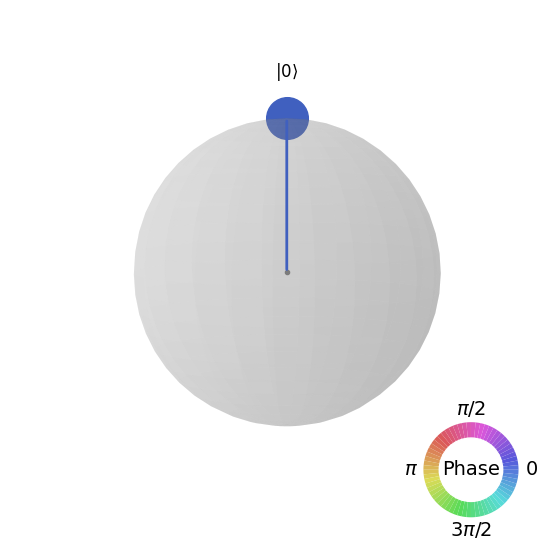

In [10]:
qsphere(portaZ)

## Porta S

**A porta S adiciona uma fase imaginária $\frac{\pi}{2}$ ao estado $\left|1\right>$. Nada é feito ao estado $\left|0\right>$.**

In [11]:
portaS = QuantumCircuit(1)
portaS.h(0)
portaS.s(0)
portaS.draw("mpl")

In [12]:
qsphere(portaS)

Dessa vez, coloquei o qubit inicialmente em superposição para demonstrar a alteração de fase que ocorre somente ao componente $\left|1\right>$. Ela adiciona uma mudança de fase que equivale a uma rotação de $\frac{\pi}{2}$ no eixo imaginário. Note que o eixo imaginário não é uma direção física.

## Porta T

**A porta T adiciona uma fase imaginária $\frac{\pi}{4}$ ao estado $\left|1\right>$. Nada é feito ao estado $\left|0\right>$.**

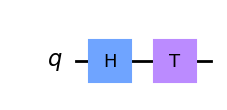

In [13]:
portaT = QuantumCircuit(1)
portaT.h(0)
portaT.t(0)
portaT.draw("mpl")

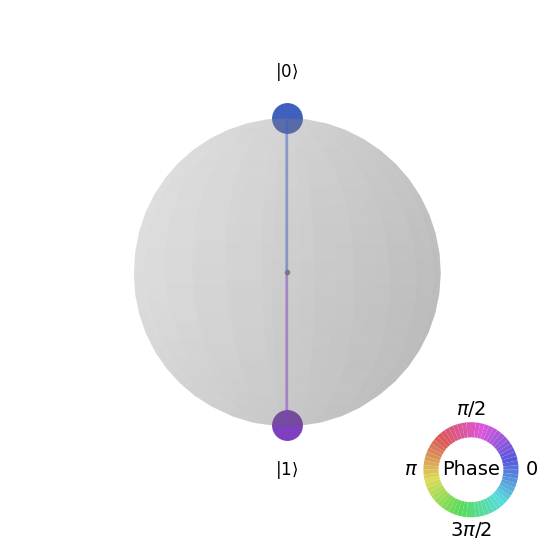

In [14]:
qsphere(portaT)

O funcionamento da porta T é muito semelhante ao da porta S.

## Porta CNOT

**A porta CNOT, assim como a NOT, faz um bit-flip com o qubit alvo. No entanto, essa inversão de estado só ocorre caso o bit de controle esteja em $\left|1\right>$.**

In [15]:
cnot = QuantumCircuit(2)
cnot.x(0) # Alterando o valor do primeiro qubit para 1, este será nosso bit de controle
cnot.cx(0, 1) # Para a função de criação da CNOT, os argumentos são: (bit controle, bit alvo)
cnot.draw("mpl")

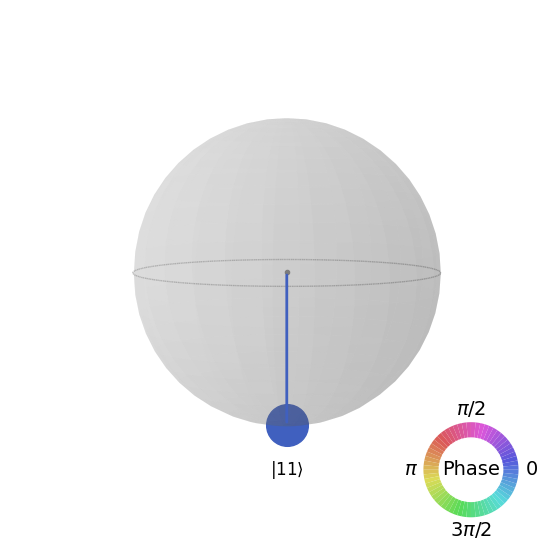

In [16]:
qsphere(cnot)

Lembre que os estados vêm por padrão em $\left|0\right>$. Assim, podemos ver que o reultado da medição do `qubit de controle` $q_{0}$ no estado $\left|1\right>$ permite a troca de estado do `qubit alvo` $q_{1}$ também para $\left|1\right>$.

## Swap

**A porta SWAP troca os valores entre si de dois qubits selecionados.**


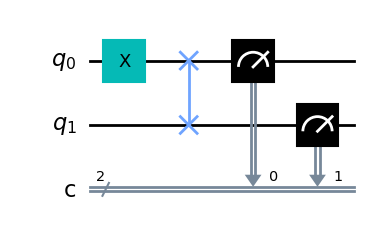

In [17]:
swap = QuantumCircuit(2, 2)
swap.x(0)
swap.swap(1, 0)
swap.measure([0, 1], [0, 1])
swap.draw("mpl")

Nesse caso, $q_{0}$, que antes era $\left|1\right>$ graças à `Porta X`, obteve $\left|0\right>$ e realizou a troca com $q_{1}$, que por sua vez também assumiu o valor do seu vizinho.

## Concluão

Se algumas funções de determinadas portas ainda pareçam muito confusas, é compreensível, pois, estão aqui, marjoritariamente, fora de contexto. O objetivo deste documento é explicar as operações que cada uma faz. Entretanto, podemos resumir a funcionalidade de cada uma para facilitar a sua compreensão.


`
A porta de Hadamard coloca o qubit em estado de superposição. As portas NOT e CNOT  invertem o estado do qubit, com a diferença de que a última precisa de um bit de controle. As portas, X, Y, Z, S e T alteram a fase ou rotacionam o estado, isso é feito geralmente para correção ou ajuste. E por fim, a porta SWAP inverte entre si os estados entre os qubits selecionados.
`